In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from lib import costFunction, gradientDescent, featureNormalize, plotCostSurface

# Load data

In [2]:
data = pd.read_csv('housing.data', delim_whitespace=True, header=None)
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data.columns = columns

X = data['RM'].values
y = data['MEDV'].values

# Single variable

## Plot

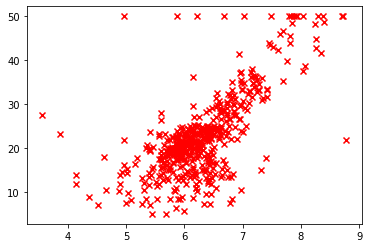

In [3]:
ax = plt.subplot()
ax.scatter(X, y, marker='x', color='red')
plt.show()

## Compute cost function

### ※YOUR CODE IS HERE

In [4]:
X_ = np.array([np.ones(len(X)), X]).T
y_ = y.reshape(len(X), 1)

J = costFunction(X_, y_, np.zeros((2, 1)))
print('Testing cost function: %.2f' % J)

J = costFunction(X_, y_, np.array([[-1], [1]]))
print('Testing cost function: %.2f' % J)

Testing cost function: 296.07
Testing cost function: 186.72


In [5]:
costFunction(X_, y_, np.zeros((2, 1)))

296.0734584980237

Your cost function will be below.

```
Testing cost function: 296.07
Testing cost function: 186.72
```

### ※END

## Gradient descent

### ※YOUR CODE IS HERE

In [6]:
m = len(X)
theta = np.zeros((2, 1))
iterations = 1500
alpha = 0.01
theta_min, j = gradientDescent(X_, y_, theta, alpha, iterations, intercept=True)
print('Theta min: \n', theta_min)
print('Cost min: %.3f' % j)

Theta min: 
 [[-5.25408702]
 [ 4.47768074]]
Cost min: 27.131


**Your theta min and cost function will be**

```
Theta min: 
 [[-5.25408702]
 [ 4.47768074]]
Cost min: 27.131
```

In [7]:
print(X_.shape)
print(theta.shape)
print((np.dot(X_, theta)).shape)

(506, 2)
(2, 1)
(506, 1)


### ** END **

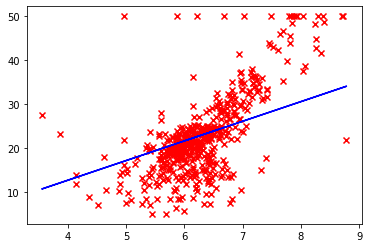

In [8]:
ax = plt.subplot()
ax.scatter(X, y, marker='x', color='red')
ax.plot(X, np.dot(X_, theta_min).reshape(-1), color='blue')
plt.show()

In [9]:
theta_hist, j_hist = gradientDescent(X_, y_, theta, alpha, iterations, history=True)
theta0_hist = [theta_hist[i][0][0] for i in range(len(theta_hist))]
theta1_hist = [theta_hist[i][1][0] for i in range(len(theta_hist))]
M, B = np.meshgrid(theta0_hist, theta1_hist)
Z = np.meshgrid(j_hist, j_hist)[0]

In [10]:
%%time
if False:
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(M, B, Z, rstride=1, cstride=1, cmap="plasma")
    fig.colorbar(surf)
    plt.show()

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 1.91 µs


In [11]:
%%time
if False:
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111)
    surf = ax.contour(M.ravel(), B.ravel(), Z, cmap="plasma")
    plt.show()

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 1.67 µs


# Multi variables

In [12]:
X = data[['RM', 'TAX']].values
y = data['MEDV'].values
y_ = y.reshape(len(y), 1)

## Gradient Descent

### ** YOUR CODE IS HERE **

In [88]:
X = featureNormalize(X)
X_ = np.hstack((np.ones((len(X), 1)), X))
theta = np.zeros((3, 1))
iterations = 1500
alpha = 0.01
theta_min, j = gradientDescent(X_, y_, theta, alpha, iterations, intercept=True)
print('Theta min: \n', theta_min)
print('Cost min: %.3f' % j)

Theta min: 
 [[ 15.97985767]
 [-13.48516074]
 [ -5.89444693]]
Cost min: 33.155


**Your theta min and cost function will be**

```
Theta min: 
 [[ 15.97985767]
 [-13.48516074]
 [ -5.89444693]]
Cost min: 33.155
```

### ** END **